In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Average(dat):
    return sum(dat) / len(dat)

In [4]:
#Data Output ID3 Imputasi
dat_id3 = pd.read_excel('ID3_imputasi.xlsx')
akurasi_id3 = dat_id3["Akurasi"]
presisi_id3 = dat_id3["Presisi"]
recall_id3 = dat_id3["Recall"]
ratAkurasi_ID3 = round(Average(akurasi_id3), 2)
ratPresisi_ID3 = round(Average(presisi_id3), 2)
ratRecall_ID3 = round(Average(recall_id3), 2)

#Data Output ID3 Non Imputasi
dat_id3_n = pd.read_excel('ID3_nonImput_3.xlsx')
akurasi_id3_n = dat_id3_n["Akurasi"]
presisi_id3_n = dat_id3_n["Presisi"]
recall_id3_n = dat_id3_n["Recall"]
ratAkurasi_ID3_n = round(Average(akurasi_id3_n), 2)
ratPresisi_ID3_n = round(Average(presisi_id3_n), 2)
ratRecall_ID3_n = round(Average(recall_id3_n), 2)

#Data Output ID3 Bagging
ID3_bagAk = pd.read_excel("ID3_bagging_imputasi_akurasi.xlsx")
ID3_bagPr = pd.read_excel("ID3_bagging_imputasi_recall.xlsx")
ID3_bagRe = pd.read_excel("ID3_bagging_imputasi_presisi.xlsx")
ID3_bag_hasil_akhir = pd.read_excel("ID3_bagging_imputasi_hasil_akhir.xlsx")
ID3_ratAkurasi_bagging = [ID3_bag_hasil_akhir['k:'+str(i)][0] for i in  range(2,ID3_bag_hasil_akhir.shape[1]+1)]
ID3_ratPresisi_bagging = [ID3_bag_hasil_akhir['k:'+str(i)][1] for i in  range(2,ID3_bag_hasil_akhir.shape[1]+1)]
ID3_ratRecall_bagging = [ID3_bag_hasil_akhir['k:'+str(i)][2] for i in  range(2,ID3_bag_hasil_akhir.shape[1]+1)]
ID3_maxAkurasi_Bagging = max(ID3_ratAkurasi_bagging)
ID3_maxPresisi_Bagging = max(ID3_ratPresisi_bagging)
ID3_maxRecall_Bagging = max(ID3_ratRecall_bagging)

#Data Output ID3 Bagging Non Imputasi
ID3_bagAk_n = pd.read_excel("ID3_bagging_nonImput_akurasi_3.xlsx")
ID3_bagPr_n = pd.read_excel("ID3_bagging_nonImput_recall_3.xlsx")
ID3_bagRe_n = pd.read_excel("ID3_bagging_nonImput_presisi_3.xlsx")
ID3_bag_hasil_akhir_n = pd.read_excel("ID3_bagging_nonImput_hasil_akhir_3.xlsx")
ID3_ratAkurasi_bagging_n = [ID3_bag_hasil_akhir_n['k:'+str(i)][0] for i in  range(2,ID3_bag_hasil_akhir_n.shape[1]+1)]
ID3_ratPresisi_bagging_n = [ID3_bag_hasil_akhir_n['k:'+str(i)][1] for i in  range(2,ID3_bag_hasil_akhir_n.shape[1]+1)]
ID3_ratRecall_bagging_n = [ID3_bag_hasil_akhir_n['k:'+str(i)][2] for i in  range(2,ID3_bag_hasil_akhir_n.shape[1]+1)]
ID3_maxAkurasi_Bagging_n = max(ID3_ratAkurasi_bagging_n)
ID3_maxPresisi_Bagging_n = max(ID3_ratPresisi_bagging_n)
ID3_maxRecall_Bagging_n = max(ID3_ratRecall_bagging_n)

In [5]:
def tabelPerbandinganMetode():
    dat = []

    dat.append(["Akurasi",ratAkurasi_ID3, ratAkurasi_ID3_n, ID3_maxAkurasi_Bagging, ID3_maxAkurasi_Bagging_n])
    dat.append(["Presisi",ratPresisi_ID3, ratPresisi_ID3_n, ID3_maxPresisi_Bagging, ID3_maxPresisi_Bagging_n])
    dat.append(["Recall",ratRecall_ID3, ratRecall_ID3_n, ID3_maxRecall_Bagging, ID3_maxRecall_Bagging_n])
    
    dat2 = pd.DataFrame(dat, columns=['Keterangan', 'ID3 Imputasi', 'ID3 Non Imputasi', 'ID3 Bagging Imputasi', 'ID3 Bagging Non Imputasi'])

    return dat2

PerbandinganMetode = tabelPerbandinganMetode()
PerbandinganMetode.to_excel("Perbandingan_metode_ID3_imputasi_&_non_imputasi.xlsx")
print(PerbandinganMetode)

  Keterangan  ID3 Imputasi  ID3 Non Imputasi  ID3 Bagging Imputasi  \
0    Akurasi         74.89             71.42                 76.83   
1    Presisi         63.26             57.92                 69.29   
2     Recall         67.99             53.85                 65.03   

   ID3 Bagging Non Imputasi  
0                     72.44  
1                     62.70  
2                     49.23  


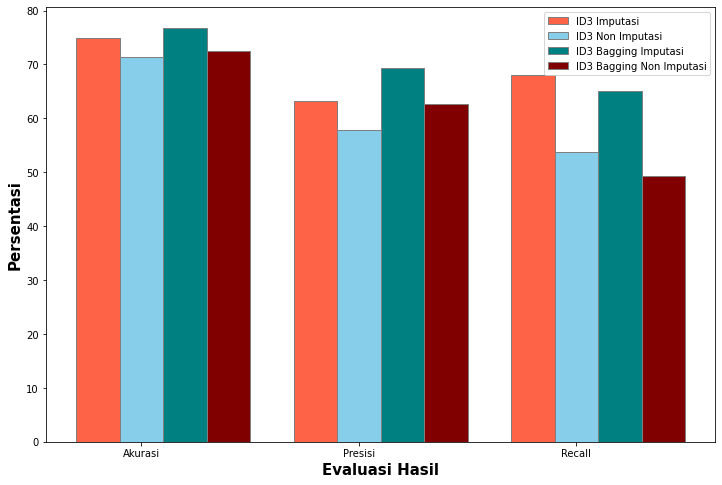

In [6]:
def perbandingan_semua_metode():
    # set width of bar
    barWidth = 0.20
    fig = plt.subplots(figsize =(12, 8))

    # set height of bar
    label = ['ID3 Imputasi', 'ID3 Non Imputasi', 'ID3 Bagging Imputasi', 'ID3 Bagging Non Imputasi']
    # Akurasi = [PerbandinganMetode[label[i]][0] for i in range(len(label))]
    ID3_Imputasi = PerbandinganMetode['ID3 Imputasi']
    ID3_Non_Imputasi = PerbandinganMetode['ID3 Non Imputasi']
    ID3_Bagging_Imputasi = PerbandinganMetode['ID3 Bagging Imputasi']
    ID3_Bagging_Non_Imputasi = PerbandinganMetode['ID3 Bagging Non Imputasi']

    # Set position of bar on X axis
    br1 = np.arange(len(ID3_Imputasi))
    br2 = [x + barWidth for x in br1]
    br3 = [x + barWidth for x in br2]
    br4 = [x + barWidth for x in br3]

    # Make the plot
    plt.bar(br1, ID3_Imputasi, color ='tomato', width = barWidth,edgecolor ='grey', label ='ID3 Imputasi')
    plt.bar(br2, ID3_Non_Imputasi, color ='skyblue', width = barWidth,edgecolor ='grey', label ='ID3 Non Imputasi')
    plt.bar(br3, ID3_Bagging_Imputasi, color ='teal', width = barWidth,edgecolor ='grey', label ='ID3 Bagging Imputasi')
    plt.bar(br4, ID3_Bagging_Non_Imputasi, color ='maroon', width = barWidth,edgecolor ='grey', label ='ID3 Bagging Non Imputasi')

    # Adding Xticks
    plt.xlabel('Evaluasi Hasil', fontweight ='bold', fontsize = 15)
    plt.ylabel('Persentasi', fontweight ='bold', fontsize = 15)
    plt.xticks([r + barWidth for r in range(len(ID3_Imputasi))],['Akurasi', 'Presisi', 'Recall'])

    plt.legend()
    plt.show()
    
perbandingan_semua_metode()